In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import cgs as cgs

using cgs py


In [2]:
def solvr(x,t,A):
    return [x[1],A/x[0]]

In [3]:
rho_i = 1.0 * cgs.mp * 1.31
rho_h = 1.0E-4 * cgs.mp * 0.62
v = 200.0E5
r_o = 400.*cgs.pc

A = rho_h * v*v * 0.5 / rho_i

In [4]:
t = np.linspace(0.0,500.0,1000.0)*cgs.Myr
r = integrate.odeint(solvr, [r_o,0], t, args=(A,))

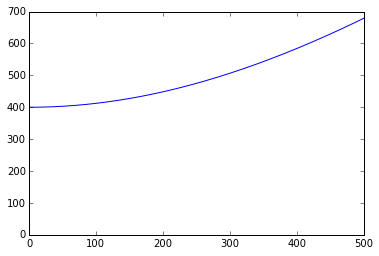

In [5]:
plt.plot(t/cgs.Myr,r/cgs.pc)

In [6]:
from initial_conditions import ic_list as icl

Loading IC for  Leo_T_burkert
Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  Sextans_test
MUST SET A 'potential_type'
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  CarinaMidMed
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  Leo_T_solve_burkert
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  Leo_test
MUST SET A 'potential_type'
Loaded IC's for  7  dwarf galaxies


In [7]:
carina = icl.ic_object_dict['CarinaMidMed']

In [8]:
### now for something entirely different ###

def f(y, t, rho_halo, v, rho_gas):
    # y contains mass as y[0] and radius as y[1]
    Mi = y[0]
    Ri = y[1]
    
    
    num = 1.0
    if Mi <= 0 or Ri <=0:
        Ri = 0.0
        num = 0.0
    #else: 
    rdot = -0.5 * (4.0/3.0)*(rho_halo/rho_gas(Ri))**0.5 * v
    mdot = 4.0*np.pi*Ri**2 * rho_gas(Ri) * rdot
  

    
    return [num*mdot, num*rdot]
    
    
    

In [9]:
print carina.ic.keys()
print carina.ic['RM'] / cgs.pc


['r_s', 'T_dwarf', 'b', 'mu_halo', 'RM', 'M200', 'n_halo', 'potential_type', 'M_DM', 'mu_dwarf', 'n_o', 'r_DM', 'c', 'T_halo', 'rho_crit']
423.12007563


In [10]:
rho_halo = carina.ic['n_halo'] * cgs.mp * carina.ic['mu_halo']
v = 200.0E5
R_o = carina.ic['RM']
M_o = 6.6E5 * cgs.Msun # approx

t = np.linspace(0.0,120.0,10000.0)*cgs.Myr

soln = integrate.odeint(f, [M_o,R_o],t, args=(rho_halo, v, carina.find_density_profile,))


In [11]:
M = soln[:,0]; R = soln[:,1]
select = M > 0
M = M[select]; t = t[select]; R = R[select]

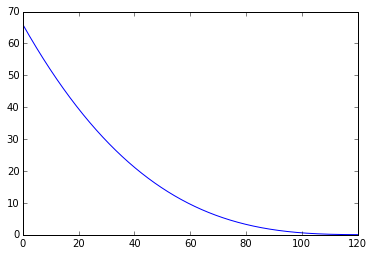

In [12]:
plt.plot(t/cgs.Myr, M/(1.0E4*cgs.Msun))

In [13]:
cgs.G*1.0E4*cgs.Msun*1.0*cgs.mp/(cgs.pc)

7.196275478746473e-13

In [14]:
1.0E-4*cgs.mp*200E5*200E5

6.69048e-14

In [32]:
r  = np.linspace(1.0*cgs.pc,R_o,1000)
rho_gas = carina.find_density_profile(r)
rho_DM  = carina.DM_density(r)
integrand = lambda x: x*x*carina.DM_density(x)
gas = lambda x: x*x*carina.find_density_profile(x)
M_DM = np.zeros(np.size(r)-1)
M_gas = np.zeros(np.size(r)-1)
for i in np.arange(1,np.size(r)):
    M_DM[i-1] = 4.0*np.pi* integrate.quad(integrand, r[i-1], r[i])[0]
    M_gas[i-1] = 4.0*np.pi* integrate.quad(gas, r[i-1],r[i])[0]

In [44]:
RHS = (M_DM + 10.0*M_gas) * rho_gas[:-1] / r[:-1] * cgs.G * np.pi * 0.5
LHS = rho_halo * v*v
RPS = np.zeros(np.size(r[:-1]))
np.size(RPS[LHS>RHS])


999

In [42]:
print LHS
print RHS

7.05176592e-14
[  1.08943236e-12   1.02797154e-12   9.92683213e-13   9.68949962e-13
   9.51338062e-13   9.37364164e-13   9.25732116e-13   9.15699224e-13
   9.06809312e-13   8.98766687e-13   8.91371253e-13   8.84482753e-13
   8.77999942e-13   8.71847897e-13   8.65969971e-13   8.60322536e-13
   8.54871435e-13   8.49589541e-13   8.44455028e-13   8.39450132e-13
   8.34560245e-13   8.29773236e-13   8.25078946e-13   8.20468799e-13
   8.15935500e-13   8.11472803e-13   8.07075328e-13   8.02738407e-13
   7.98457975e-13   7.94230470e-13   7.90052754e-13   7.85922052e-13
   7.81835900e-13   7.77792098e-13   7.73788677e-13   7.69823865e-13
   7.65896066e-13   7.62003832e-13   7.58145849e-13   7.54320919e-13
   7.50527949e-13   7.46765935e-13   7.43033954e-13   7.39331156e-13
   7.35656755e-13   7.32010022e-13   7.28390281e-13   7.24796903e-13
   7.21229298e-13   7.17686918e-13   7.14169247e-13   7.10675800e-13
   7.07206123e-13   7.03759785e-13   7.00336380e-13   6.96935524e-13
   6.93556852e-13  